In [4]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [14]:
fields= ['U','p','k','omega', 'nut']
mainfolder='airfoil2d/airFoil_1500_ssim_large/'

xlim =[-80,80]
ylim = [-50 , 50]
xres=256
yres=66
zcut=0.05

In [15]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_1500_ssim_large/
airFoil_1500_ssim_large_0
airFoil_1500_ssim_large_20
write airfoil2d/airFoil_1500_ssim_large//input.npy


In [16]:
data=np.load(mainfolder+'/input.npy')

In [17]:
modelfolder='cfdnetplus_models/model_ssim_largedomain/'
model = tf.keras.models.load_model(modelfolder,compile=False)
normal=np.load(modelfolder+'/normal.npy')  

In [18]:
data=data*1/normal

In [19]:
prediction=model.predict(data)
prediction=prediction*normal
np.save(mainfolder+'/pred',prediction)

1/1 [==============================] - 0s 109ms/step


In [20]:
print(normal)

[[[[4.12839795e+03 4.12839795e+03 4.12839795e+03 7.13929600e+07
    2.46646750e+05 1.91369863e+04 4.40144768e+01]]]]


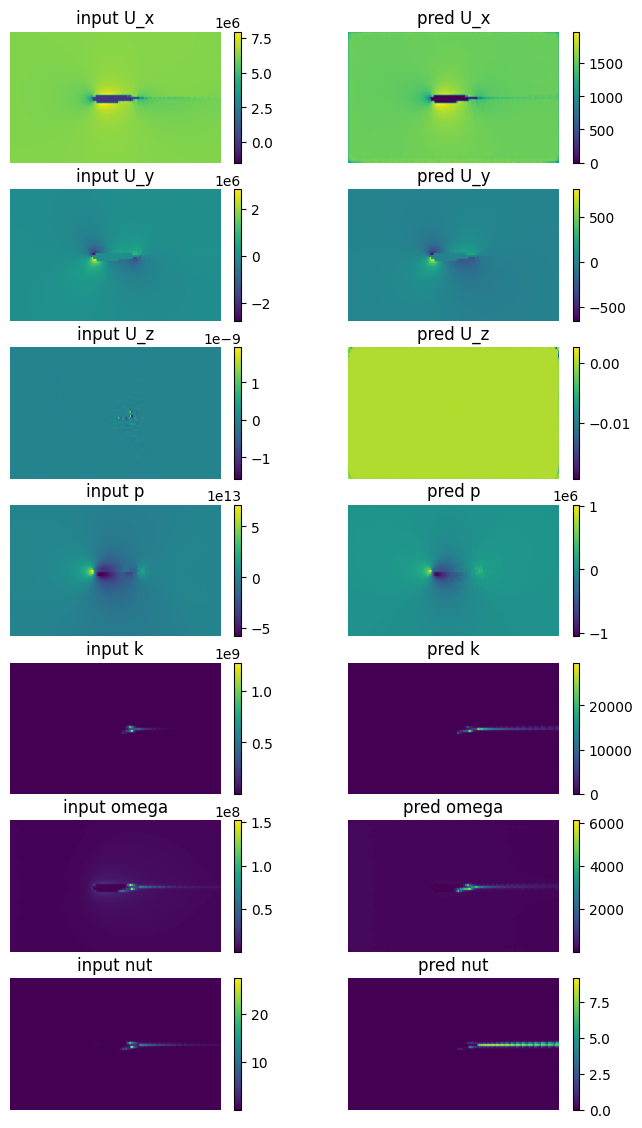

In [22]:
pred=np.load(mainfolder+'/pred.npy')
data=data*normal
n=0
fig = plt.figure(figsize=(8, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()

In [23]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_1500_ssim_large_0
airFoil_1500_ssim_large_20
folder airfoil2d/airFoil_1500_ssim_large//21 was created
write airfoil2d/airFoil_1500_ssim_large//21/U
write airfoil2d/airFoil_1500_ssim_large//21/p
write airfoil2d/airFoil_1500_ssim_large//21/k
write airfoil2d/airFoil_1500_ssim_large//21/omega
write airfoil2d/airFoil_1500_ssim_large//21/nut
